<b><font size=6 color=mediumblue>Laboratory I</font></b>

## Welcome to your ocean first OCP 5050 Laboratory!
In this lab you'll have a chance to further explore the structure of ocean water masses by plotting maps and sections of various ocean properties and linking what you see to what you know so far about how the ocean is forced and how it moves
### <font color='mediumblue'>Learning Goals</font>
By the end of this notebook, you will
1. Plot sections of temperature, salinity, and oxygen as well as T-S diagrams in the Atlantic and Pacific Oceans
2. Identify major water masses based on the above properties
3. Look at property differences across the Atlantic and Pacific oceans
4. Write down some basic notes about what you see in your figures to prepare you for your lab report

# Part I: Gathering what you need
## 1. Background information
1. The data: we'll be using data from the [World Ocean Atlas 2023](https://www.ncei.noaa.gov/products/world-ocean-atlas) (WOA23), which is a global gridded data product derived from oceanographic data from the [World Ocean Database](https://www.ncei.noaa.gov/products/world-ocean-database). The dataset is 3D (depth, lat, lon) – it's on a 1˚ longitude x 1˚ latitude grid and has standard depth levels.
2. Identifying water masses: water masses are usually defined by specific characteristics such as temperature, salinity, and nutrient content. As part of your lab report, you'll need to identify some of the major water masses in each ocean basin on the plots that you make in this notebook.
## 2. Importing things and reading in the data
Run the following block of code to import the packages you'll need to successfully complete the laboratory

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import gsw

Below is some python code that reads in the data we'll be working with today. There are three variables in the WOA23 dataset provided:
1. t_an: the annual mean <i>in situ</i> temperature [˚C]
2. s_an: the annual mean salinity [g/kg] (same as ppt)
3. o_an: the annual mean oxygen mass concentration [$\mu$mol/kg]

There are also latitude (lat), longitude (lon), and depth (depth) variables. Everything else you can ignore!

In [2]:
ds = xr.open_dataset('WOA23.nc')

In [3]:
print(ds.t_an)

<xarray.DataArray 't_an' (depth: 102, lat: 180, lon: 360)> Size: 26MB
[6609600 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 1kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * depth    (depth) float32 408B 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
Attributes:
    standard_name:  sea_water_temperature
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    units:          degrees_celsius


In [5]:
print(ds.s_an)

<xarray.DataArray 's_an' (depth: 102, lat: 180, lon: 360)> Size: 26MB
[6609600 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 1kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * depth    (depth) float32 408B 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
Attributes:
    standard_name:  sea_water_practical_salinity
    long_name:      Objectively analyzed mean fields for sea_water_practical_...
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    units:          1


In [6]:
print(ds.o_an)

<xarray.DataArray 'o_an' (depth: 102, lat: 180, lon: 360)> Size: 26MB
[6609600 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 1kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * depth    (depth) float32 408B 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
Attributes:
    standard_name:  moles_of_oxygen_per_unit_mass_in_sea_water
    long_name:      Objectively analyzed mean fields for moles_of_oxygen_per_...
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    units:          micromoles_per_kilogram


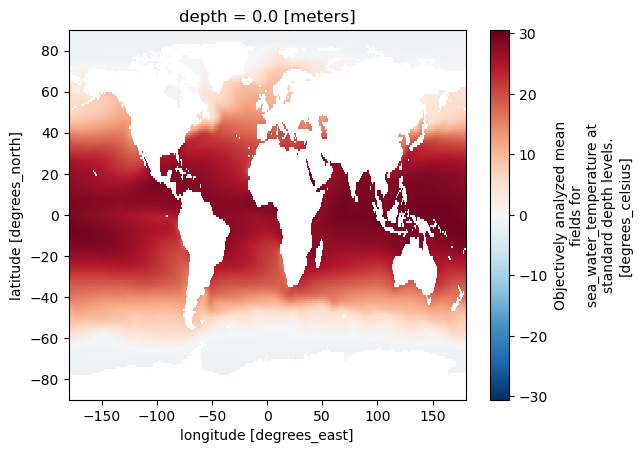

In [10]:
ds['t_an'].isel(depth=0).plot.pcolormesh()